In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('spam.csv',encoding='cp1252')


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. data cleaning
# 2. EDA
# 3. text preprocessing
# 4. model building
# 5. evaluation
# 6. improvement
# 7. website
# 8. deployment

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 columns as it has no use
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4782,ham,Especially since i talk about boston all up in...
3672,ham,Moji just informed me that you saved our lives...
3248,ham,"Sorry, I can't help you on this."
1205,ham,The whole car appreciated the last two! Dad an...
1582,ham,"Yep, at derek's house now, see you Sunday &lt;3"


In [9]:
# renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
1481,ham,"I'm a guy, browsin is compulsory"
1220,spam,No. 1 Nokia Tone 4 ur mob every week! Just txt...
913,ham,Ok lor but not too early. Me still having proj...
1139,ham,Message:some text missing* Sender:Name Missing...
5557,ham,No. I meant the calculation is the same. That ...


In [11]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['target']=le.fit_transform((df['target']))

In [12]:
df.sample(5)


,target,text
2342,1,Double your mins & txts on Orange or 1/2 price...
1655,0,At 7 we will go ok na.
1911,0,Lol grr my mom is taking forever with my presc...
2007,0,Hi here. have birth at on the to at 8lb 7oz....
804,0,K I'll be there before 4.


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [15]:
# remove duplicate values
df.drop_duplicates(keep='first',inplace=True)

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5169, 2)

# 2. EDA

In [18]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

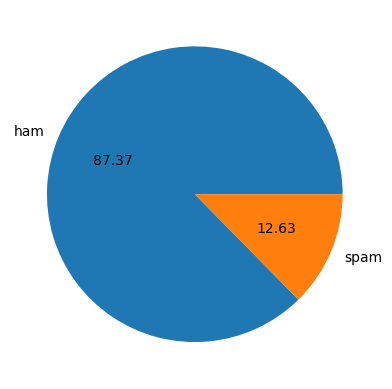

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# data is imbalanced we will use stratify in train_test_split


In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [388]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
# num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [390]:
df.head()

,target,text,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [26]:
df['numofwords'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [27]:
df.head()

,target,text,num_characters,num_sentences,numofwords
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [28]:
df.describe()

,target,num_characters,num_sentences,numofwords
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,1.965564,18.455794
std,0.332253,58.236293,1.448541,13.324758
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,1.000000,9.000000
50%,0.000000,60.000000,1.000000,15.000000
75%,0.000000,117.000000,2.000000,26.000000
max,1.000000,910.000000,38.000000,220.000000


In [29]:
#ham
df[df['target']==0][['num_characters','num_sentences','numofwords']].describe()

,num_characters,num_sentences,numofwords
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,17.123782
std,56.358207,1.383657,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [30]:
#spam
df[df['target']==1][['num_characters','num_sentences','numofwords']].describe()

,num_characters,num_sentences,numofwords
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,27.667688
std,30.137753,1.488425,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


In [31]:
# histogram
import seaborn as sns



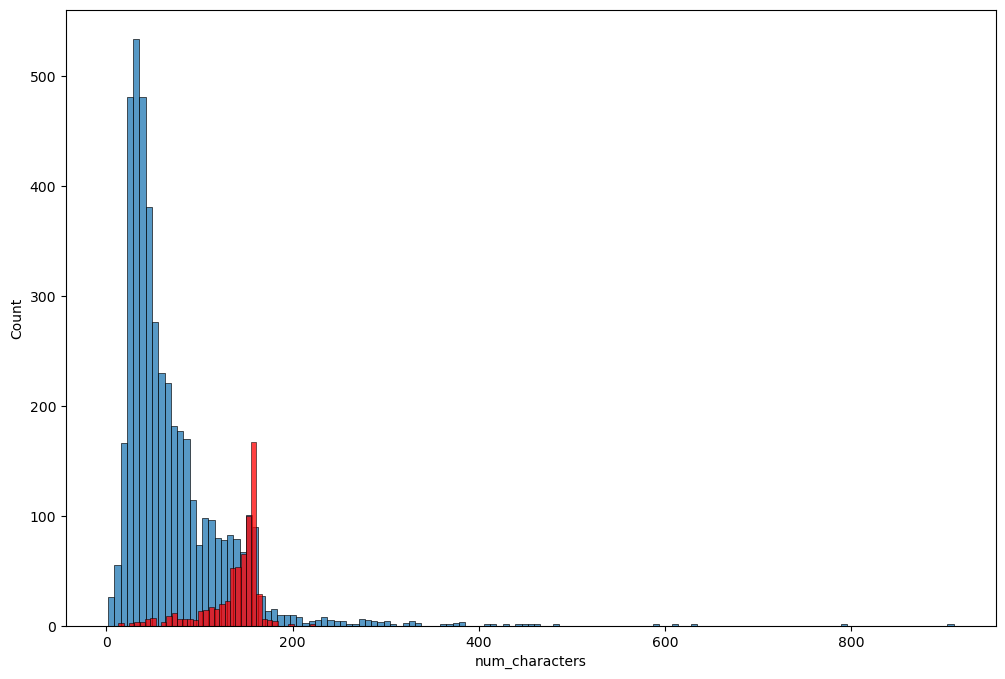

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()

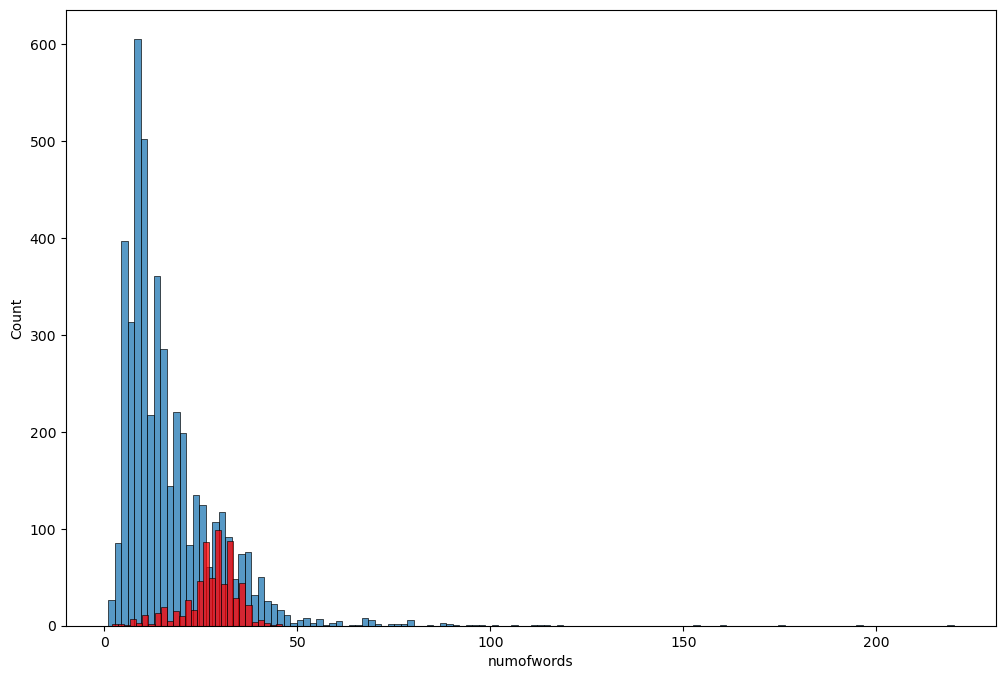

In [398]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['numofwords'])
sns.histplot(df[df['target']==1]['numofwords'],color='red')
plt.show()

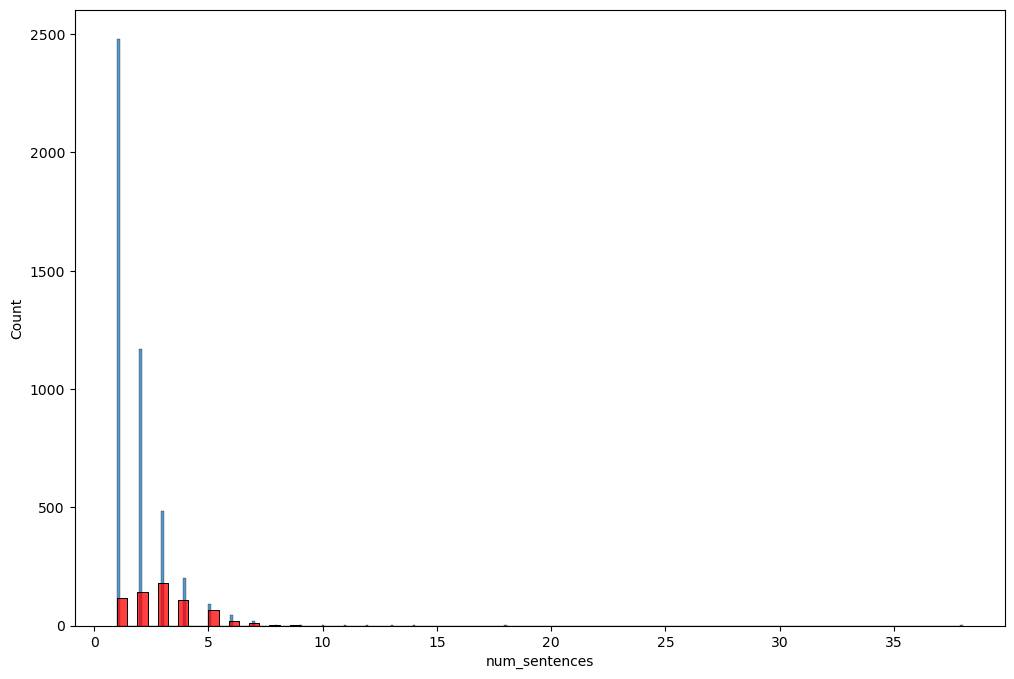

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')
plt.show()

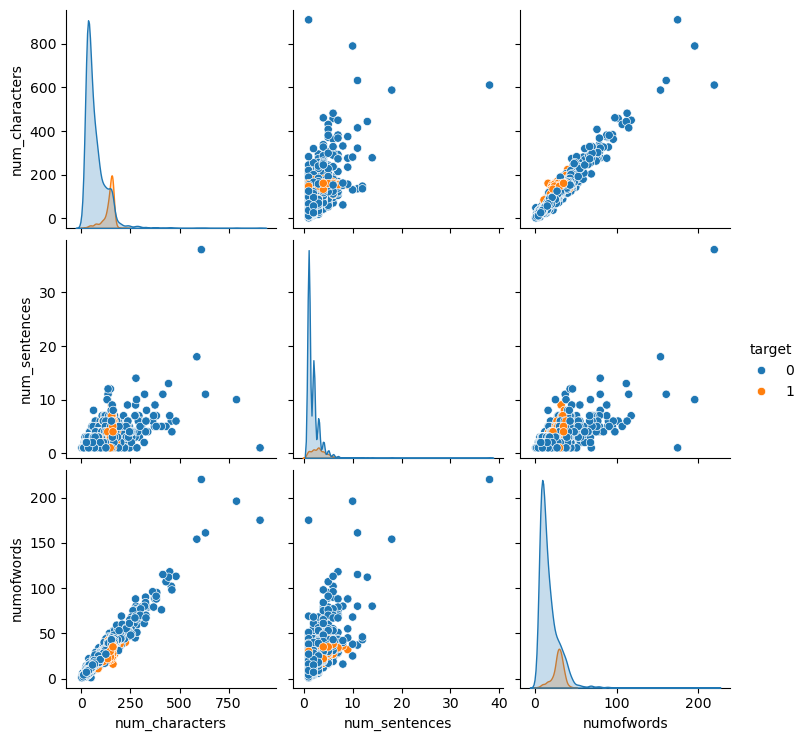

In [34]:
sns.pairplot(df,hue='target')

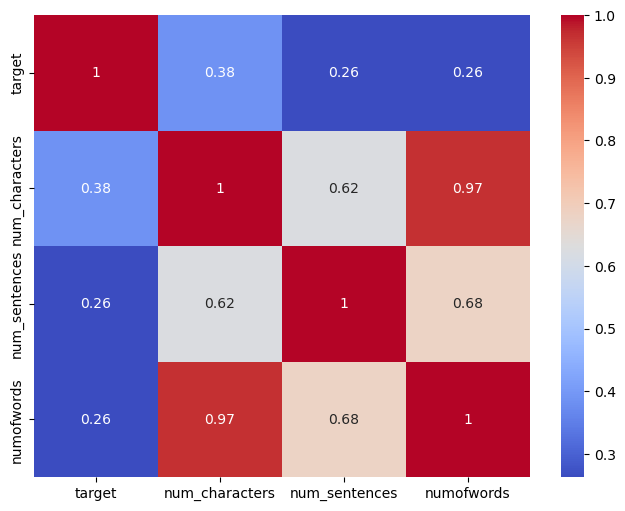

In [35]:
plt.figure(figsize=(8,6))
# select only numeric columns to avoid conversion errors
numeric_df = df.select_dtypes(include=['number'])
# compute correlation on numeric columns only
corr = numeric_df.corr()
# plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# 3 data preprocesing

# lower case
# tokenization
# remving stop word and puntuation
# stemming

In [36]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
ps = PorterStemmer()

def tranform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for token in text:
        # keep only alphanumeric tokens
        if token.isalnum():
            if token not in stopwords.words('english') and token not in string.punctuation:
                stemmed = ps.stem(token)
                y.append(stemmed)
    return " ".join(y)

In [39]:
 df['transformed_text'] = df['text'].apply(tranform_text)

In [40]:
df.head()

,target,text,num_characters,num_sentences,numofwords,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [41]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

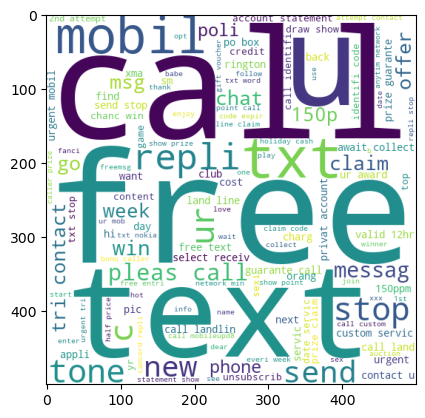

In [410]:
plt.imshow(spam_wc)

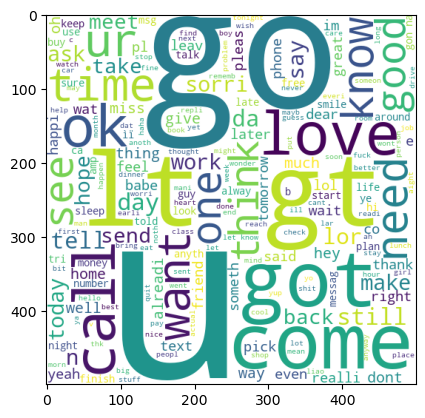

In [43]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)


In [44]:
df.head()

,target,text,num_characters,num_sentences,numofwords,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [45]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
         spam_corpus.append(word)

In [46]:
len(spam_corpus)

9939

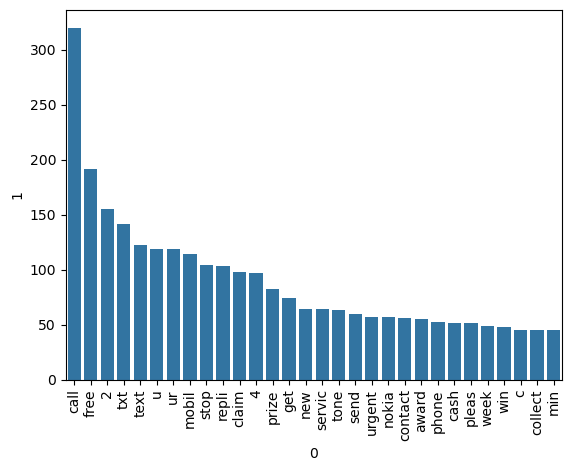

In [47]:
from collections import Counter
x_axis=pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
y_axis=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
sns.barplot(x=x_axis,y=y_axis)
plt.xticks(rotation='vertical')
plt.show()

In [48]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
         ham_corpus.append(word)

In [49]:
len(ham_corpus)

35404

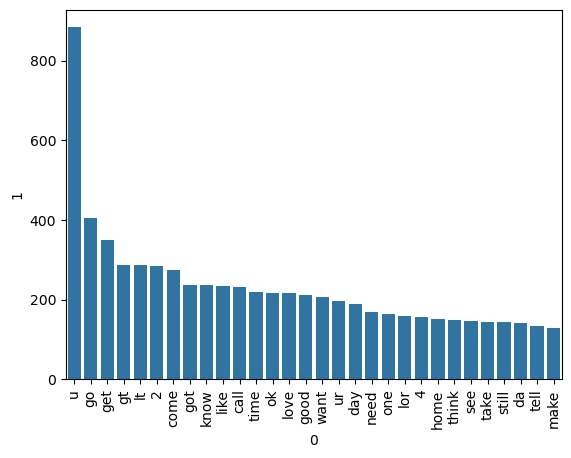

In [50]:
hamx_axis=pd.DataFrame(Counter(ham_corpus).most_common(30))[0]
hamy_axis=pd.DataFrame(Counter(ham_corpus).most_common(30))[1]
sns.barplot(x=hamx_axis,y=hamy_axis)
plt.xticks(rotation='vertical')
plt.show()

In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

X=tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [52]:
y=df['target'].values

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)    


In [54]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [435]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8771760154738878
[[790 113]
 [ 14 117]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.93       903
           1       0.51      0.89      0.65       131

    accuracy                           0.88      1034
   macro avg       0.75      0.88      0.79      1034
weighted avg       0.92      0.88      0.89      1034

0.508695652173913


In [57]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

[[903   0]
 [ 18 113]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       1.00      0.86      0.93       131

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034

1.0


In [439]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[901   2]
 [ 22 109]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.98      0.83      0.90       131

    accuracy                           0.98      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.98      0.98      0.98      1034

0.9819819819819819


In [440]:
# tfidf ->> mnb is best


In [443]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,ExtraTreesClassifier,BaggingClassifier
from xgboost import XGBClassifier


In [446]:
# now assign models to a list and do a loop to find the best model
model=[LogisticRegression(),SVC(),LinearSVC(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=5),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),ExtraTreesClassifier(),BaggingClassifier(),XGBClassifier(),GaussianNB(), MultinomialNB(), BernoulliNB()]

In [447]:
len(model)

14

In [ ]:
# # loop and check accuracy,create a data frame to store the results
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score
# generatedResults = []
# for m in model:
#     m.fit(X_train,y_train)
#     y_pred=m.predict(X_test)
#     print(m)
#     print("Accuracy:",accuracy_score(y_test,y_pred))
#     print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
#     print("Classification Report:\n",classification_report(y_test,y_pred))
#     print("Precision Score:",precision_score(y_test,y_pred))

#     generatedResults.append({
#         "Model": m,
#         "Accuracy": accuracy_score(y_test,y_pred),
#         "Confusion Matrix": confusion_matrix(y_test,y_pred),
#         "Classification Report": classification_report(y_test,y_pred),
#         "Precision Score": precision_score(y_test,y_pred)
#     })

LogisticRegression()
Accuracy: 0.9545454545454546
Confusion Matrix:
 [[901   2]
 [ 45  86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       903
           1       0.98      0.66      0.79       131

    accuracy                           0.95      1034
   macro avg       0.96      0.83      0.88      1034
weighted avg       0.96      0.95      0.95      1034

Precision Score: 0.9772727272727273
SVC()
Accuracy: 0.9758220502901354
Confusion Matrix:
 [[902   1]
 [ 24 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       903
           1       0.99      0.82      0.90       131

    accuracy                           0.98      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.98      0.98      0.97      1034

Precision Score: 0.9907407407407407
LinearSVC()
Accuracy: 0.9864603481624759
Confusion Matrix

In [58]:
# pickle the best model
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))